# Optimization Methods for Data Science
### A.A. 2024-2025

Alessandro Pannone
Ph.D. Student @ Sapienza University of Rome

pannone@diag.uniroma1.it

# Lecture 1
## An Introduction to Optimization in Python


## NumPy
Documentation: https://numpy.org/doc/stable/index.html

NumPy is a Python library for scientific computing; it provides a multidimensional array object and an assortment of routines for fast operations on arrays. It is very efficient since it's implemented in C.

In [ ]:
import numpy as np

#### First of all...why NumPy?

Because 'pure' python is slow!!

For example, suppose you need to perform matrix multiplication.
Let's compare speed of numpy vs python implementations 

In [ ]:
from typing import List


def slow_mat_mul(m1: List[List[float]], m2: List[List[float]]) -> List[List[float]]:
    """
    Matrix multiplication written in pure python
    """

    # GET MATRIX DIMENSION
    m1_rows = len(m1)
    m1_cols = len(m1[0])
    m2_rows = len(m2)
    m2_cols = len(m2[0])

    # CHECK IF DIMENSIONS ARE COMPATIBLE
    if m1_cols != m2_rows:
        raise ValueError("Invalid shapes provided!")
    
    # INITIALIZE RESULT MATRIX
    res = [[0 for j in range(m2_cols)] for i in range(m1_rows)]

    # DO MATRIX MULTIPLICATION
    for i in range(m1_rows):
        for j in range(m2_cols):
            # AVOID MEMORY ACCES FOR EACH K
            elem = 0
            for k in range(m1_cols):
                elem += m1[i][k] * m2[k][j]
            res[i][j] = elem

    return res


In [ ]:
import time

# INITIALIZE MATRICES (THESE ARE NUMPY ARRAYS)
m1_np = np.random.randint(low=0, high=100, size=[64, 128])
m2_np = np.random.randint(low=0, high=100, size=[128, 64])

# CONVERT ARRAYS INTO NESTED LIST
m1_py = m1_np.tolist()
m2_py = m2_np.tolist()

# DO MATRIX MULTIPLICATION IN PURE PYTHON
start_py = time.time()
res_py = slow_mat_mul(m1=m1_py, m2=m2_py)
end_py = time.time()

# DO MATRIX MULTIPLICATION IN NUMPY
start_np = time.time()
res_np = np.dot(a=m1_np, b=m2_np)
end_np = time.time()

print(f"duration pure python: {end_py - start_py} --- duration numpy: {end_np - start_np}")


#### How to create NumPy Arrays

In [ ]:
# CREATING NUMPY ARRAY FROM PYTHON LIST
list_ = [4, 6, 17, 8, 12.5]
vector = np.array(list_)
print("Vector from list:")
print(vector)

nested_list = [
    [1, 2, 3, 0],
    [4, 5, 6, 0], 
    [7, 8, 9, 0]
]
matrix = np.array(nested_list)
print("Matrix from nested list:")
print(matrix)

# CREATING AN ARRAY OF ELEMENTS FROM START (INCLUDED) TO STOP (NOT INCLUDED) WITH A GIVEN STEP
a = np.arange(start=0, stop=10, step=1)
print("\nFrom range:", a)

# CREATING AN ARRAY OF NUM EVENLY SPACED SAMPLES BETWEEN START AND STOP
b = np.linspace(start=0, stop=5, num=10, endpoint=False)
print("\nEvenly spaced samples:", b)

# DISPLAYING DATA TYPES
print("Data type of array a: ", a.dtype)
print("Data type of array b: ", b.dtype)

# CREATING A RANDOM ARRAY OF SIZE [3, 5] --> MATRIX WITH 3 ROWS AND 5 COLUMNS. EACH ELEMENT IS
# DRAWN FROM A UNIFORM DISTRIBUTION BETWEEN O AND 1
c = np.random.rand(3, 5)
print("\nRandom elements between 0 and 1 (uniform distribution)")
print(c)

# ALL ZEROS
zeros_array = np.zeros((4, 2))
print("\nZeros array:")
print(zeros_array)

# ALL ONES
ones_array = np.ones((2, 5))
print("\nOnes array:")
print(ones_array)


Be careful: when using the numpy random module, it is always better to set the seed at the beginning of the code in order to be able to reproduce the same behaviour.

In [ ]:
np.random.seed(100)

print(np.random.rand(10))
print(np.random.rand(10))

### Multi-dimensional arrays

In [ ]:
# GENERATING A RANDOM 2D ARRAY WITH SHAPE (5, 2)
a = np.random.random(size=(5, 2))
print("Random 2D array:")
print(a, "\n")

print("Shape of the array: ", a.shape) 
print("Number of dimensions: ", a.ndim)
print("Value at position (0, 0): ", a[0, 0])
print("Bottom right value: ", a[-1, -1])
print("Values in the first row: ", a[0, :])
print("Values in the second column: ", a[:, 1])

# GENERATING A RANDOM 3D ARRAY WITH SHAPE (5, 2, 2)
a = np.random.random(size=(3, 2, 2))
print("\nRandom 3D array:")
print(a, "\n")
print("Shape of the array:", a.shape)
print("Number of dimensions:", a.ndim) 
print("Values in the first slice (2D array at index 0):")
print(a[0, :, :])

### Mathematical Operations in NumPy

In [ ]:
# GENERATING A RANDOM 2D ARRAY WITH SHAPE (5, 2) --> EACH ELEMENT IS BETWEEN O AND 9
a = np.random.randint(0, 10, size=(5, 2))
print("Random 2D array: ")
print(a, "\n")

print("Shape of the array:", a.shape)
print("Number of dimensions:", a.ndim)

print("Maximum value in the entire array: ", np.max(a))
print("Minimum value in the entire array: ", np.min(a))
print("Sum of all elements in the entire array: ", np.sum(a))
print("L2 norm in the entire array: ", np.linalg.norm(a, axis=0))


# MAX, MIN, SUM, NORM ALONG AXIS 0 --> BY COLUMN
print("\nMax along axis 0: ", np.max(a, axis=0))
print("Min along axis 0: ", np.min(a, axis=0))
print("Sum along axis 0: ", np.sum(a, axis=0))
print("L2 norm along axis 0: ", np.linalg.norm(a, axis=0))

# MAX, MIN, SUM, NORM ALONG AXIS 0 --> BY ROW
print("\nMax along axis 1: ", np.max(a, axis=1))
print("Min along axis 1: ", np.min(a, axis=1))
print("Sum along axis 1: ", np.sum(a, axis=1))
print("L2 norm along axis 1: ", np.linalg.norm(a, axis=1))

In [ ]:
# GENERATING A RANDOM 2D ARRAY WITH SHAPE (5, 2) --> EACH ELEMENT IS BETWEEN O AND 9
a = np.random.randint(0, 10, size=(5, 2))
print("Random 2D array:")
print(a)

# RESHAPE ARRAY
b = a.reshape(2, 5)
print("\nReshaped array (2x5):")
print(b, "\n")

# FLATTEN ARRAY
c = np.ravel(a)
print("Shape before ravel: ", a.shape)
print("Flatten array (1D):")
print(c)
print("Shape after ravel: ", c.shape)

# TRANSPOSE THE ARRAY
d = np.transpose(a) # SAME OF DOING a.T
print("\nTransposed array:")
print(d)

In [ ]:
# COMPONENENT-WISE OPERATIONS
a = np.random.randint(low=0, high=10, size=[2, 3])
b = np.random.randint(low=0, high=10, size=[2, 3])

result = a + b # YOU CAN ALSO SUBRACT (-), MULTIPLY (*), DIVIDE (/), POWER (**)...
print("Array a:")
print(a)
print("Array b:")
print(b)
print("Result:")
print(result)

In [ ]:
# PAY ATTENTION TO INPUT SHAPES!
a = np.random.rand(3, 4)
b = np.random.rand(3, 10)
res = a + b

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations.

See https://numpy.org/doc/stable/user/basics.broadcasting.html for more details (link to documentation)

See https://towardsdatascience.com/broadcasting-in-numpy-58856f926d73 (good explanation on how broadcasting works)

In this example, we can think of the scalar b being stretched during the arithmetic operation into an array with the same shape as a. The new elements in b, as shown in Figure 1, are simply copies of the original scalar. The stretching analogy is only conceptual. NumPy is smart enough to use the original scalar value without actually making copies so that broadcasting operations are as memory and computationally efficient as possible.

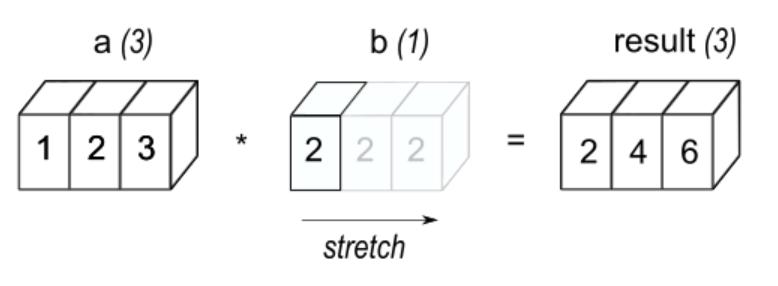

In [ ]:
# BROADCASTING: ADD SCALAR TO ARRAY
scalar_value = 5
a = np.array([1, 2, 3])
result = a + scalar_value
print("Adding scalar to array:")
print("Array a:", a)
print("Scalar value:", scalar_value)
print("Result:", result)
print()

# BROADCASTING: MULTIPLY ARRAY BY SCALAR
scalar_value = 2
a = np.random.randint(low=0, high=10, size=[3, 4])
result = a * scalar_value
print("Multiplying array by scalar:")
print("Array a:")
print(a)
print("Scalar value:", scalar_value)
print("Result:")
print(result)
print()

# BROADCASTING: ADD ARRAYS OF DIFFERENT SIZES
print("Add vector to each row")
a = np.random.randint(low=0, high=10, size=[3, 4])
print("Array a:")
print(a)

b = np.array([1, 2, 3, 4]).reshape([1, 4]) # RESHAPE IS NOT NECESSARY IN THIS CASE
print("Array b: ", b)
result = a + b
print("Result:")
print(result)
print()

print("Add vector to each column")
print("Array a:")
print(a)

b = np.array([1, 2, 3]).reshape([3, 1])
print("Array b:")
print(b)
result = a + b
print("Result:")
print(result)


Two of the most frequent numerical operations in Machine Learning are:

1) __scalar product__ between two vectors $v,w \in \mathbb{R}^n$, defined as
$$ v^T w = \sum_{i=1}^n v_i w_i$$

2) __component-wise product__ between two vectors $v,w \in \mathbb{R}^n$, defined as a vector $z \in \mathbb{R}^n$: $$\ \ z_i = v_i w_i \ \forall i=1,\dots,n$$


In [ ]:
v1 = np.array([2, 3, 4])
v2 = np.array([5, 6, 7])

# SCALAR PRODUCT
scalar_prod = np.dot(v1, v2)

print("Scalar Product:")
print("Vector 1:", v1)
print("Vector 2:", v2)
print("Result:", scalar_prod)
print()


A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
v = np.array([1, 2, 3]).reshape([3, 1]) # RESHAPE IS NOT NECESSARY

# MATRIX VECTOR PRODUCT
mv_product = np.dot(A, v)

print("Matrix-Vector Product:")
print("Matrix:")
print(A)
print("Vector:")
print(v)
print("Result:")
print(mv_product)
print()

B = np.array([[1, 2],
              [3, 4],
              [5, 6]])
C = np.array([[7, 8],
              [9, 10]])

# MATRIX MATRIX PRODUCT
mm_product = np.dot(B, C)

print("Matrix-Matrix Product:")
print("Matrix B:")
print(B)
print("Matrix C:")
print(C)
print("Result:")
print(mm_product)
print()


*...Pay attention to the input shapes!*

In [ ]:
a = np.random.rand(3, 4)
b = np.random.rand(5, 2)
np.dot(a, b)

#### Standard Scaling using NumPy Broadcasting
Standard scaling (also known as z-score normalization) is a common preprocessing technique used in machine learning to standardize the range of features in the dataset. It transforms the data to have a mean of 0 and a standard deviation of 1.


In [ ]:
a = np.random.randint(low=0, high=20, size=[10,])
print("Array before scaling: ", a)

# COMPUTE MEAN AND STANDARD DEVIATION
mu = np.mean(a)
std = np.std(a)

# SCALE
a_scaled = (a - mu) / std

print(f"Mean: {mu} --- Standard deviation: {std}")
print("Scaled array: ", a_scaled)